In [22]:
import pandas as pd
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import random
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [23]:
# load the CSV file with the positive reviews
files_pos = pd.read_csv('/content/IMDB.csv', error_bad_lines=False, engine="python")
files_pos = files_pos[0:1000]

<ipython-input-23-2ff6d6f74da3>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  files_pos = pd.read_csv('/content/IMDB.csv', error_bad_lines=False, engine="python")
Skipping line 46648: unexpected end of data


In [24]:
# load the CSV file with the negative reviews
files_neg = pd.read_csv('/content/IMDB.csv', error_bad_lines=False, engine="python")
files_neg = files_neg[1000:2000]

<ipython-input-24-8cc07f88175d>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  files_neg = pd.read_csv('/content/IMDB.csv', error_bad_lines=False, engine="python")


In [25]:
# create a list of stopwords
stop_words = set(stopwords.words("english"))

# create a list of allowed word types (in this case, adjectives)
allowed_word_types = ["J"]

documents = []
all_words = []

# loop over each positive review
for index, row in files_pos.iterrows():
    # extract the review text from the CSV file
    review_text = row['review']

    # remove punctuation and convert to lowercase
    cleaned = re.sub(r'[^\w\s]', '', review_text.lower())

    # create a list of tuples where the first element of each tuple is a review and the second element is the label
    documents.append((cleaned, "positive"))

    # tokenize the text
    tokenized = word_tokenize(cleaned)

    # remove stopwords
    stopped = [w for w in tokenized if not w in stop_words]

    # parts of speech tagging for each word
    positive = nltk.pos_tag(stopped)

    # make a list of all adjectives identified by the allowed word types list above
    for w in positive:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())



In [26]:
# loop over each negative review
for index, row in files_neg.iterrows():
    # extract the review text from the CSV file
    review_text = row['review']

    # remove punctuation and convert to lowercase
    cleaned = re.sub(r'[^\w\s]', '', review_text.lower())

    # create a list of tuples where the first element of each tuple is a review and the second element is the label
    documents.append((cleaned, "negative"))

    # tokenize the text
    tokenized = word_tokenize(cleaned)

    # remove stopwords
    stopped = [w for w in tokenized if not w in stop_words]

    # parts of speech tagging for each word
    negative = nltk.pos_tag(stopped)

    # make a list of all adjectives identified by the allowed word types list above
    for w in negative:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())


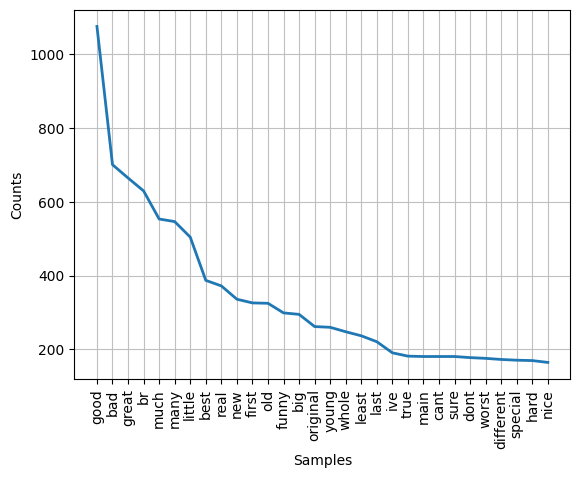

In [27]:
# create a frequency distribution of each adjective
all_words = nltk.FreqDist(all_words)

# plot the most common adjectives
import matplotlib.pyplot as plt
all_words.plot(30, cumulative=False)
plt.show()

In [28]:
# get the most frequent words
word_features = list(all_words.keys())[:1000]


In [29]:
# create a feature set for each document
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

In [30]:

# create feature sets for the documents using the find_features function
featuresets = [(find_features(rev), category) for (rev, category) in documents]
random.shuffle(featuresets)

In [31]:
# split the feature sets into training and testing sets
training_set = featuresets[:800]
testing_set = featuresets[800:]

In [32]:
# Sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [33]:
classifier = nltk.NaiveBayesClassifier.train(testing_set)
print("classifier accuracy percent", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

classifier accuracy percent 76.08333333333334
Most Informative Features
             protagonist = True           positi : negati =      6.5 : 1.0
                   endbr = True           positi : negati =      5.1 : 1.0
                americas = True           positi : negati =      4.4 : 1.0
                     rid = True           positi : negati =      4.4 : 1.0
                 wealthy = True           positi : negati =      4.3 : 1.0
              equivalent = True           positi : negati =      3.7 : 1.0
                 forgive = True           negati : positi =      3.6 : 1.0
               murderous = True           negati : positi =      3.6 : 1.0
               desperate = True           positi : negati =      3.4 : 1.0
               impressed = True           positi : negati =      3.4 : 1.0
                 likable = True           positi : negati =      3.3 : 1.0
                   quiet = True           negati : positi =      3.2 : 1.0
                 popular = T

In [34]:
# train and test various classifiers using the training and testing sets
MNB_clf = SklearnClassifier(MultinomialNB())
mnb_cls = MNB_clf.train(training_set)
print("MultinomialNB Classifier accuracy percent:", (nltk.classify.accuracy(mnb_cls, testing_set)*100))


MultinomialNB Classifier accuracy percent: 50.24999999999999


In [35]:

# train and test various classifiers using the training and testing sets
MNB_clf = SklearnClassifier(MultinomialNB())
mnb_cls = MNB_clf.train(training_set)
print("MultinomialNB Classifier accuracy percent:", (nltk.classify.accuracy(mnb_cls, testing_set)*100))


MultinomialNB Classifier accuracy percent: 50.24999999999999


In [36]:
MNB_clf= SklearnClassifier(BernoulliNB())
bnb_cls =MNB_clf.train(training_set)
print('Classifier accuracy percent:', (nltk.classify.accuracy(bnb_cls, testing_set))*100)

Classifier accuracy percent: 51.583333333333336


In [37]:
MNB_clf= SklearnClassifier(BernoulliNB())
bnb_cls =MNB_clf.train(training_set)

print('Classifier accuracy percent:', (nltk.classify.accuracy(bnb_cls, testing_set))*100)

Classifier accuracy percent: 51.583333333333336


In [38]:
from sklearn.linear_model import LogisticRegression
LogReg_clf= SklearnClassifier(LogisticRegression())
log_cls =LogReg_clf.train (training_set)
print("Classifier accuracy percent:", (nltk.classify.accuracy (log_cls, testing_set))*188)

Classifier accuracy percent: 93.84333333333333


In [39]:
from sklearn.linear_model import SGDClassifier
SGD_clf = SklearnClassifier (SGDClassifier())
log_cls= SGD_clf.train(training_set)
print("Classifier accuracy percent:", (nltk.classify.accuracy (log_cls, testing_set))*180)


Classifier accuracy percent: 89.25


In [40]:
from sklearn.svm import SVC
SVC_clf=SklearnClassifier(SVC())
svc_cls = SVC_clf.train(training_set)
print("Classifier accuracy percent:", (nltk.classify.accuracy (svc_cls, testing_set))*100)

Classifier accuracy percent: 51.583333333333336


In [43]:
# Function to preprocess input text and predict sentiment
def predict_sentiment(input_text):
    cleaned = re.sub(r'[^\w\s]', '', input_text.lower())
    tokenized = word_tokenize(cleaned)
    stopped = [w for w in tokenized if not w in stop_words]
    positive = nltk.pos_tag(stopped)

    input_features = {}
    for w in positive:
        if w[1][0] in allowed_word_types and w[0].lower() in word_features:
            input_features[w[0].lower()] = True

    sentiment = mnb_cls.classify(input_features)  # Use the mnb_cls classifier
    return sentiment

In [44]:
# Example usage:
user_input = input("Enter a movie review: ")
result = predict_sentiment(user_input)
print("Predicted sentiment:", result)

Enter a movie review: I thoroughly enjoyed watching this movie. The acting was fantastic, and the plot kept me engaged from start to finish.
Predicted sentiment: positive
